# Assignment01

## 라이브러리

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [55]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
tada_eta = pd.read_excel('/content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/assignment01/tada_eta.xlsx')
tada_eta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ATA             13916 non-null  float64
 1   id              13916 non-null  object 
 2   api_eta         13916 non-null  float64
 3   created_at_kst  13916 non-null  object 
 4   month           13916 non-null  int64  
 5   pickup_lng      13916 non-null  float64
 6   pickup_lat      13916 non-null  float64
 7   pickup_gu       13916 non-null  object 
 8   driver_id       13916 non-null  object 
 9   driver_lng      13916 non-null  float64
 10  driver_lat      13916 non-null  float64
 11  hour            13916 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.3+ MB


## EDA

In [88]:
tada_eta.describe()

,ATA,api_eta,month,pickup_lng,pickup_lat,driver_lng,driver_lat,hour
count,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000,13916.000000
mean,8.386438,6.172346,10.146019,127.002390,37.527512,126.956952,37.514084,13.278672
std,4.094109,3.151074,2.415177,0.057423,0.031143,2.407714,0.711941,6.971578
min,0.430000,0.000000,7.000000,126.798391,37.439779,0.000000,0.000000,0.000000
25%,5.470000,3.800000,7.000000,126.969020,37.503890,126.967620,37.503930,8.000000
50%,7.780000,5.950000,12.000000,127.013602,37.523343,127.013432,37.522791,14.000000
75%,10.520000,8.180000,12.000000,127.040485,37.551443,127.041342,37.551953,19.000000
max,44.780000,25.280000,12.000000,127.174993,37.686526,127.174070,37.683888,23.000000


In [89]:
tada_eta.head()

,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [90]:
tada_eta['distance'] = ( (tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2 )*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [91]:
tada_eta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATA       13916 non-null  float64
 1   api_eta   13916 non-null  float64
 2   month     13916 non-null  int64  
 3   hour      13916 non-null  int64  
 4   distance  13916 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 543.7 KB


### 상관계수

In [92]:
tada_eta.corr()

,ATA,api_eta,month,hour,distance
ATA,1.000000,0.699267,-0.084542,0.038504,-0.029074
api_eta,0.699267,1.000000,-0.129561,0.050434,-0.023683
month,-0.084542,-0.129561,1.000000,0.017370,0.006704
hour,0.038504,0.050434,0.017370,1.000000,-0.005650
distance,-0.029074,-0.023683,0.006704,-0.005650,1.000000


### 이상치 확인

In [93]:
tada_eta.describe()

,ATA,api_eta,month,hour,distance
count,13916.000000,13916.000000,13916.000000,13916.000000,1.391600e+04
mean,8.386438,6.172346,10.146019,13.278672,6.300930e+05
std,4.094109,3.151074,2.415177,6.971578,3.323532e+07
min,0.430000,0.000000,7.000000,0.000000,0.000000e+00
25%,5.470000,3.800000,7.000000,8.000000,3.122371e+00
50%,7.780000,5.950000,12.000000,14.000000,1.112458e+01
75%,10.520000,8.180000,12.000000,19.000000,3.069393e+01
max,44.780000,25.280000,12.000000,23.000000,1.754298e+09


In [94]:
tada_eta['distance'].max()

1754297836.8400323

In [95]:
tada_eta['distance'].min()

0.0

In [96]:
tada_eta[tada_eta['distance'] > 400].count()

ATA         8
api_eta     8
month       8
hour        8
distance    8
dtype: int64

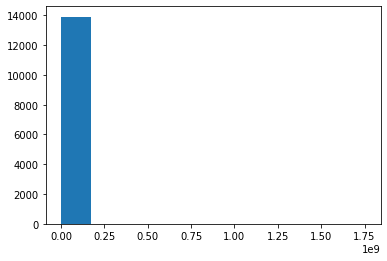

In [97]:
plt.hist(tada_eta['distance']);

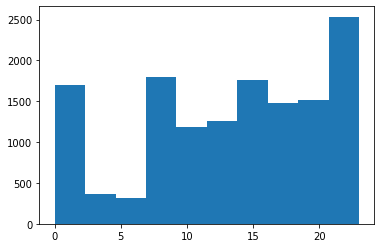

In [98]:
plt.hist(tada_eta['hour']);

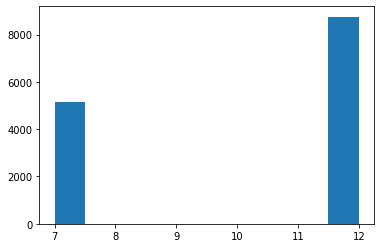

In [99]:
plt.hist(tada_eta['month']);

In [100]:
tada_eta = tada_eta[tada_eta['distance'] <= 400]
tada_eta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13908 entries, 0 to 13915
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATA       13908 non-null  float64
 1   api_eta   13908 non-null  float64
 2   month     13908 non-null  int64  
 3   hour      13908 non-null  int64  
 4   distance  13908 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 651.9 KB


## train test split

In [101]:
X = tada_eta.drop('ATA', 1)
y = tada_eta['ATA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, train_size=12000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12000, 4), (1908, 4), (12000,), (1908,))

## Random Forest

### 최적 max depth 찾기

In [103]:
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for depth in range(1, 10):
  rf = RandomForestRegressor(max_depth=depth, random_state=0)
  rf.fit(X_train, y_train)
  pred = rf.predict(X_test)
  api_eta = X_test.iloc[:, 0]
  mse = mean_squared_error(y_test, pred)
  mse_api = mean_squared_error(y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'RandomForest depth : {depth}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(y_test, pred)
  mae_api = mean_absolute_error(y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

RandomForest depth : 1
The mean squared error (MSE) on test set: 11.2560
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.5199
The initial error of API ETA on test set: 2.6014
RandomForest depth : 2
The mean squared error (MSE) on test set: 8.9377
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.1874
The initial error of API ETA on test set: 2.6014
RandomForest depth : 3
The mean squared error (MSE) on test set: 8.5483
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.1194
The initial error of API ETA on test set: 2.6014
RandomForest depth : 4
The mean squared error (MSE) on test set: 8.3843
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0942
The initial error of API ETA on test set: 2.6014
RandomForest depth : 5
The mean squared error (MSE) on test set: 8.2803
The initial error of API ETA on test set: 1

### 결과 df

In [104]:
dict = {'depth':list(range(1,10)), 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
rf_df = pd.DataFrame(dict)

In [105]:
rf_df.head()

,depth,mse,mse_api,mae,mae_api
0,1,11.256025,13.076707,2.519917,2.601415
1,2,8.937724,13.076707,2.187390,2.601415
2,3,8.548313,13.076707,2.119361,2.601415
3,4,8.384278,13.076707,2.094151,2.601415
4,5,8.280324,13.076707,2.080852,2.601415


#### 최소 MSE 값

In [106]:
rf_df[ rf_df['mse'] == rf_df['mse'].min() ]

,depth,mse,mse_api,mae,mae_api
6,7,8.191796,13.076707,2.068285,2.601415


#### 결과 시각화

In [107]:
def vis(df, model, hyper):
  plt.figure(figsize=(12,7))
  plt.grid(True)
  plt.plot(df[f'{hyper}'], df['mse'], 'o-', label='mse', linewidth=3)
  plt.plot(df[f'{hyper}'], df['mse_api'], 'o-', label='mse_api', linewidth=3)
  plt.plot(df[f'{hyper}'], df['mae'], ':', label='mae', linewidth=3)
  plt.plot(df[f'{hyper}'], df['mae_api'], ':', label='mae_api', linewidth=3)

  for i in range(df[f'{hyper}'].shape[0]):
    num_mse = df['mse'][i]
    num_mse_api = df['mse_api'][i]
    num_mae = df['mae'][i]
    num_mae_api = df['mae_api'][i]
    plt.text(df[f'{hyper}'][i], df['mse'][i], '{:.3f}'.format(num_mse), verticalalignment='bottom', fontsize=12)
    plt.text(df[f'{hyper}'][i], df['mse_api'][i], '{:.3f}'.format(num_mse_api), verticalalignment='bottom', fontsize=12)
    plt.text(df[f'{hyper}'][i], df['mae'][i], '{:.3f}'.format(num_mae), verticalalignment='bottom', fontsize=12)
    plt.text(df[f'{hyper}'][i], df['mae_api'][i], '{:.3f}'.format(num_mae_api), verticalalignment='bottom', fontsize=12)
    
  plt.title(f'{model} MSE, MAE by {hyper}', fontdict={'size':15})
  plt.xlabel(f'{hyper}', fontsize=13)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.legend(frameon=True, shadow=True, edgecolor='k', framealpha=0.5, fontsize=13);

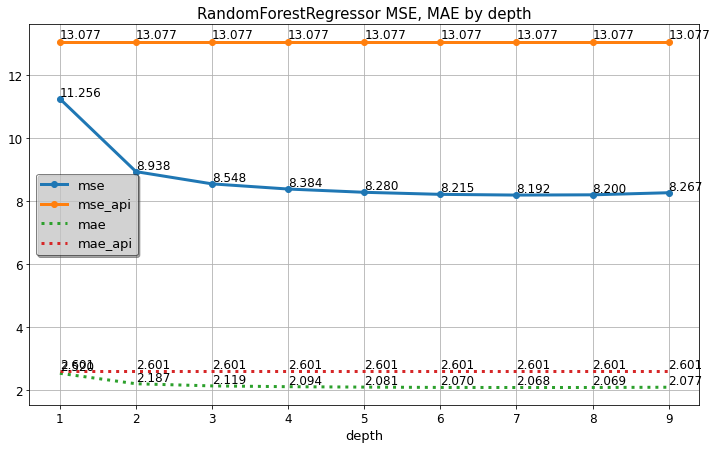

In [108]:
vis(rf_df, "RandomForestRegressor", 'depth')

### 최적의 min samples split 찾기
* 거의 변동 없어서 의미 없음

In [109]:
num_para_list = list(range(2, 20))
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for samples in num_para_list:
  rf = RandomForestRegressor(max_depth=7, random_state=0, min_samples_split=samples)
  rf.fit(X_train, y_train)
  pred = rf.predict(X_test)
  api_eta = X_test.iloc[:,0]
  mse = mean_squared_error(y_test, pred)
  mse_api = mean_squared_error(y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'RandomForest samples : {samples}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(y_test, pred)
  mae_api = mean_absolute_error(y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
  print()

RandomForest samples : 2
The mean squared error (MSE) on test set: 8.1918
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0683
The initial error of API ETA on test set: 2.6014

RandomForest samples : 3
The mean squared error (MSE) on test set: 8.1943
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0685
The initial error of API ETA on test set: 2.6014

RandomForest samples : 4
The mean squared error (MSE) on test set: 8.1891
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0685
The initial error of API ETA on test set: 2.6014

RandomForest samples : 5
The mean squared error (MSE) on test set: 8.1863
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0681
The initial error of API ETA on test set: 2.6014

RandomForest samples : 6
The mean squared error (MSE) on test set: 8.1879
The initial error of API ETA o

In [110]:
dict2 = {'samples':num_para_list, 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
rf_df2 = pd.DataFrame(dict2)
rf_df2.head()

,samples,mse,mse_api,mae,mae_api
0,2,8.191796,13.076707,2.068285,2.601415
1,3,8.194344,13.076707,2.068541,2.601415
2,4,8.189103,13.076707,2.068526,2.601415
3,5,8.186293,13.076707,2.068122,2.601415
4,6,8.187902,13.076707,2.068283,2.601415


#### 최소 MSE 값

In [111]:
rf_df2[ rf_df2['mse'] == rf_df2['mse'].min() ]

,samples,mse,mse_api,mae,mae_api
12,14,8.162941,13.076707,2.064989,2.601415


#### 결과 시각화

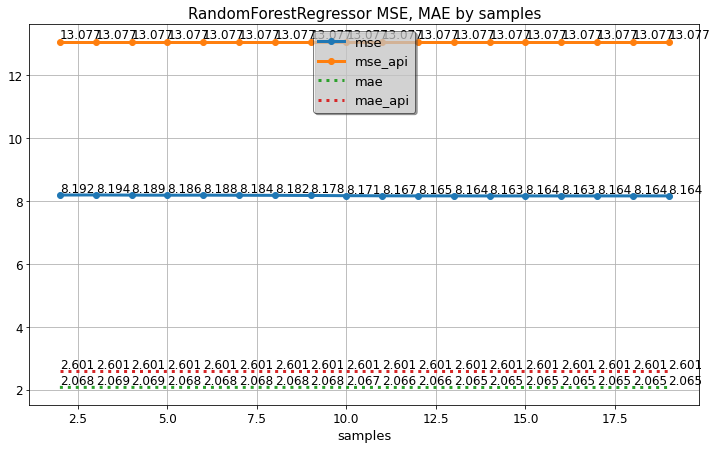

In [112]:
vis(rf_df2, "RandomForestRegressor", 'samples')

## Lighgbm

In [113]:
lgb = LGBMRegressor(n_estimators=300, random_state=0)
lgb.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)], eval_metric='mse')

/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 14.9507
[2]	valid_0's l2: 13.6794
[3]	valid_0's l2: 12.6302
[4]	valid_0's l2: 11.7923
[5]	valid_0's l2: 11.108
[6]	valid_0's l2: 10.546
[7]	valid_0's l2: 10.0909
[8]	valid_0's l2: 9.73463
[9]	valid_0's l2: 9.43743
[10]	valid_0's l2: 9.19078
[11]	valid_0's l2: 8.99218
[12]	valid_0's l2: 8.83281
[13]	valid_0's l2: 8.69914
[14]	valid_0's l2: 8.60114
[15]	valid_0's l2: 8.51152
[16]	valid_0's l2: 8.43764
[17]	valid_0's l2: 8.38362
[18]	valid_0's l2: 8.34546
[19]	valid_0's l2: 8.30708
[20]	valid_0's l2: 8.26929
[21]	valid_0's l2: 8.2278
[22]	valid_0's l2: 8.20761
[23]	valid_0's l2: 8.18779
[24]	valid_0's l2: 8.16976
[25]	valid_0's l2: 8.15638
[26]	valid_0's l2: 8.15057
[27]	valid_0's l2: 8.14227
[28]	valid_0's l2: 8.13911
[29]	valid_0's l2: 8.13264
[30]	valid_0's l2: 8.13184
[31]	valid_0's l2: 8.12793
[32]	valid_0's l2: 8.12709
[33]	valid_0's l2: 8.12256
[34]	valid_0's l2: 8.11577
[35]	valid_0's l2: 8.11874
[36]	valid_0's l2: 8.12321
[37]	valid_0's l2: 8.12325
[38]	valid_0'

LGBMRegressor(n_estimators=300, random_state=0)

In [114]:
pred = lgb.predict(X_test)
api_eta = X_test.iloc[:,0]
mse = mean_squared_error(y_test, pred)
mse_api = mean_squared_error(y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(y_test, pred)
mae_api = mean_absolute_error(y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

The mean squared error (MSE) on test set: 8.1158
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0545
The initial error of API ETA on test set: 2.6014


## LinearRegression

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
pred = lr.predict(X_test)
api_eta = X_test.iloc[:,0]
mse = mean_squared_error(y_test, pred)
mse_api = mean_squared_error(y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(y_test, pred)
mae_api = mean_absolute_error(y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

The mean squared error (MSE) on test set: 8.3144
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0960
The initial error of API ETA on test set: 2.6014


## Ridge

In [117]:
alpha_list = [0.001, 0.01, 0.1, 1]
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for a in alpha_list:
  rg = Ridge(alpha=a, random_state=0)
  rg.fit(X_train, y_train)
  pred = rg.predict(X_test)
  api_eta = X_test.iloc[:,0]
  mse = mean_squared_error(y_test, pred)
  mse_api = mean_squared_error(y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'Ridge alpha : {a}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(y_test, pred)
  mae_api = mean_absolute_error(y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
  print()

Ridge alpha : 0.001
The mean squared error (MSE) on test set: 8.3144
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0960
The initial error of API ETA on test set: 2.6014

Ridge alpha : 0.01
The mean squared error (MSE) on test set: 8.3144
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0960
The initial error of API ETA on test set: 2.6014

Ridge alpha : 0.1
The mean squared error (MSE) on test set: 8.3144
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0960
The initial error of API ETA on test set: 2.6014

Ridge alpha : 1
The mean squared error (MSE) on test set: 8.3144
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0960
The initial error of API ETA on test set: 2.6014



### 결과 df

In [118]:
dict3 = {'alpha':alpha_list, 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
rg_df = pd.DataFrame(dict3)

In [119]:
rg_df

,alpha,mse,mse_api,mae,mae_api
0,0.001,8.314383,13.076707,2.095975,2.601415
1,0.010,8.314383,13.076707,2.095975,2.601415
2,0.100,8.314383,13.076707,2.095975,2.601415
3,1.000,8.314380,13.076707,2.095975,2.601415


### 최소 MSE 값

In [120]:
rg_df[ rg_df['mse'] == rg_df['mse'].min() ]

,alpha,mse,mse_api,mae,mae_api
3,1.0,8.31438,13.076707,2.095975,2.601415


### 결과 시각화

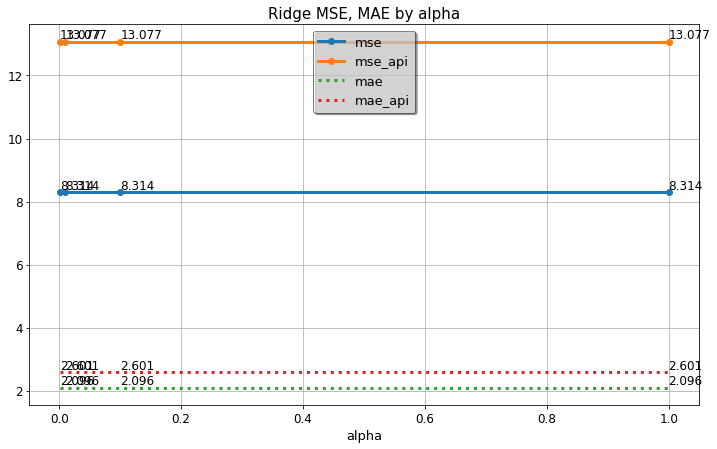

In [121]:
vis(rg_df, "Ridge", 'alpha')

## random forest와 lightgbm 결과 종합

In [122]:
# 최적의 하이퍼파라미터 적용
rf = RandomForestRegressor(max_depth=7, min_samples_split=7,random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [123]:
lgb = LGBMRegressor(n_estimators=300, random_state=0)
lgb.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)], eval_metric='mse', verbose=False)
pred_lgb = lgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [124]:
pred_rf.shape, pred_lgb.shape

((1908,), (1908,))

In [125]:
pred = (pred_rf + pred_lgb) / 2

In [126]:
pred.shape

(1908,)

In [127]:
api_eta = X_test.iloc[:,0]
mse = mean_squared_error(y_test, pred)
mse_api = mean_squared_error(y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(y_test, pred)
mae_api = mean_absolute_error(y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
print()

The mean squared error (MSE) on test set: 8.1142
The initial error of API ETA on test set: 13.0767
The mean absolute error (MAE) on test set: 2.0572
The initial error of API ETA on test set: 2.6014



# 코드 마지막